In [1]:
import os
import kagglehub
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download latest version
path = kagglehub.dataset_download("stkbailey/nashville-meetup")

print("Path to dataset files:", path)

archivos = os.listdir(path)

for archivo in archivos:
    print(archivo)

Path to dataset files: C:\Users\marco\.cache\kagglehub\datasets\stkbailey\nashville-meetup\versions\5
group-edges.csv
member-edges.csv
member-to-group-edges.csv
meta-events.csv
meta-groups.csv
meta-members.csv
rsvps.csv


In [3]:
# Define las variables de la descarga anterior
path = kagglehub.dataset_download("stkbailey/nashville-meetup")
archivos = os.listdir(path)

# Creamos el diccionario para guardar los DataFrames
dataframes = {} 

print("--- Cargando Archivos ---")

for archivo in archivos:

    df = pd.read_csv(os.path.join(path, archivo))
    
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)
         
    nombre_clave = archivo.replace(".csv", "")

    dataframes[nombre_clave] = df
                
    print(f"✅ Cargado: {nombre_clave}")
    print("-" * 20)

print("--- Carga Completa ---")
print(f"Diccionario de DataFrames creado con las siguientes claves: {dataframes.keys()}")

--- Cargando Archivos ---
✅ Cargado: group-edges
--------------------
✅ Cargado: member-edges
--------------------
✅ Cargado: member-to-group-edges
--------------------
✅ Cargado: meta-events
--------------------
✅ Cargado: meta-groups
--------------------
✅ Cargado: meta-members
--------------------
✅ Cargado: rsvps
--------------------
--- Carga Completa ---
Diccionario de DataFrames creado con las siguientes claves: dict_keys(['group-edges', 'member-edges', 'member-to-group-edges', 'meta-events', 'meta-groups', 'meta-members', 'rsvps'])


In [4]:
for col in dataframes.keys():
    print(col)
    print(dataframes[col].shape)
    
    print(dataframes[col].columns)
    print("-" * 20)

group-edges
(6692, 3)
Index(['group1', 'group2', 'weight'], dtype='object')
--------------------
member-edges
(1176368, 3)
Index(['member1', 'member2', 'weight'], dtype='object')
--------------------
member-to-group-edges
(45583, 3)
Index(['member_id', 'group_id', 'weight'], dtype='object')
--------------------
meta-events
(19307, 4)
Index(['event_id', 'group_id', 'name', 'time'], dtype='object')
--------------------
meta-groups
(602, 7)
Index(['group_id', 'group_name', 'num_members', 'category_id', 'category_name',
       'organizer_id', 'group_urlname'],
      dtype='object')
--------------------
meta-members
(24591, 7)
Index(['member_id', 'name', 'hometown', 'city', 'state', 'lat', 'lon'], dtype='object')
--------------------
rsvps
(126813, 3)
Index(['event_id', 'member_id', 'group_id'], dtype='object')
--------------------


In [38]:
group_edges=dataframes['group-edges'].copy()
member_edges=dataframes['member-edges'].copy()
member_to_group_edges=dataframes['member-to-group-edges'].copy()
meta_events=dataframes['meta-events'].copy()
meta_groups=dataframes['meta-groups'].copy()
meta_members=dataframes['meta-members'].copy()
rsvps=dataframes['rsvps'].copy()

In [51]:
members_mtg = set(member_to_group_edges['member_id'].unique())
members_mm = set(member_edges['member1']).union(set(member_edges['member2']))

print("Members in MTG but not in MM:", members_mtg - members_mm)
print("Members in MM but not in MTG:", members_mm - members_mtg)

missing = members_mtg - members_mm
print(len(missing), "miembros no aparecen en el grafo member-member")
print(missing)

Members in MTG but not in MM: {np.int64(209321984), np.int64(201162757), np.int64(199000070), np.int64(221577224), np.int64(204111883), np.int64(200605708), np.int64(209977357), np.int64(184680462), np.int64(194347021), np.int64(97910802), np.int64(78741522), np.int64(213090322), np.int64(201949205), np.int64(47185942), np.int64(154501142), np.int64(220758046), np.int64(101089312), np.int64(154992672), np.int64(236421153), np.int64(214532130), np.int64(234029095), np.int64(9732141), np.int64(151519282), np.int64(61112372), np.int64(214138937), np.int64(206078014), np.int64(197263431), np.int64(236879947), np.int64(199819341), np.int64(205389919), np.int64(231407711), np.int64(238452833), np.int64(54984802), np.int64(4948064), np.int64(237338720), np.int64(184352869), np.int64(224133226), np.int64(196968554), np.int64(188219505), np.int64(200966262), np.int64(115507322), np.int64(226754683), np.int64(223215742), np.int64(168034432), np.int64(217186434), np.int64(160858242), np.int64(156

In [52]:
print(len(members_mm), "miembros aparecen en el grafo member-member")
print(len(members_mtg), "miembros aparecen en el grafo member-to-group")

11372 miembros aparecen en el grafo member-member
24631 miembros aparecen en el grafo member-to-group


In [8]:
for col in dataframes.keys():
    print(dataframes[col].isna().sum())

group1    0
group2    0
weight    0
dtype: int64
member1    0
member2    0
weight     0
dtype: int64
member_id    0
group_id     0
weight       0
dtype: int64
event_id    0
group_id    0
name        0
time        0
dtype: int64
group_id         0
group_name       0
num_members      0
category_id      0
category_name    0
organizer_id     0
group_urlname    0
dtype: int64
member_id        0
name             0
hometown     19664
city             0
state           94
lat              0
lon              0
dtype: int64
event_id     0
member_id    0
group_id     0
dtype: int64


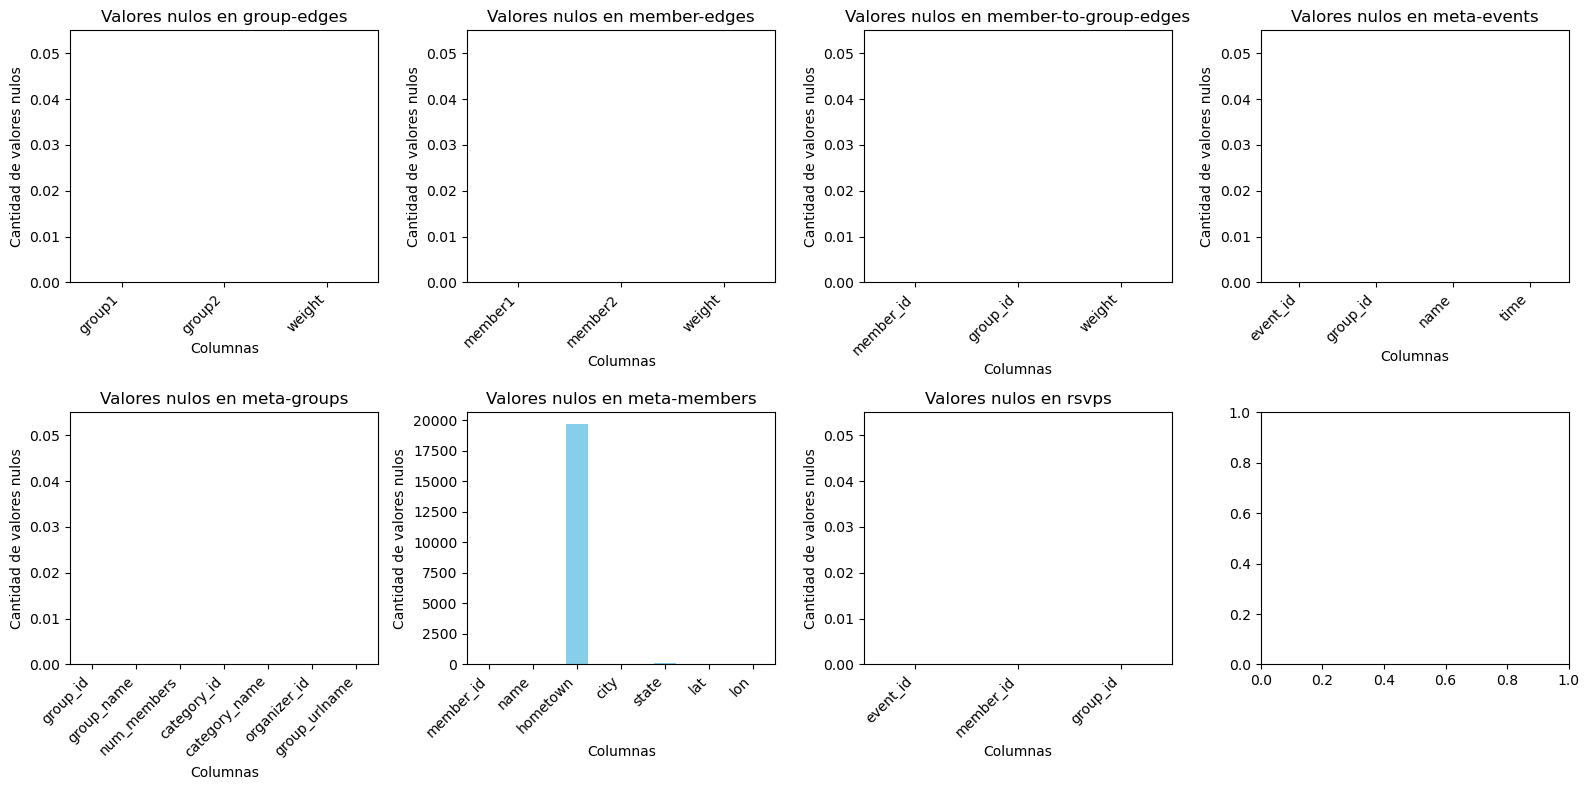

In [33]:
import matplotlib.pyplot as plt

# Crear la figura y los subgráficos (2 filas y 4 columnas)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Aplanamos los subgráficos para facilitar la iteración
axes = axes.flatten()

# Iterar sobre los DataFrames y los subgráficos
for i, (ax, (col, df)) in enumerate(zip(axes, dataframes.items())):
    # Calculamos los valores nulos por columna
    null_counts = df.isna().sum()
    
    # Crear el gráfico de barras
    null_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_ylim(0)
    ax.set_title(f'Valores nulos en {col}')
    ax.set_xlabel('Columnas')
    ax.set_ylabel('Cantidad de valores nulos')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Ajustamos el diseño para que no se solapen
plt.tight_layout()
plt.show()


In [36]:
print(meta_members.isna().sum())

member_id        0
name             0
hometown     19664
city             0
state           94
lat              0
lon              0
dtype: int64


In [37]:
meta_members.drop(columns=['hometown'], inplace=True)
meta_members.dropna(subset=['state'], inplace=True)
print(meta_members.isna().sum())

member_id    0
name         0
city         0
state        0
lat          0
lon          0
dtype: int64


In [14]:
rsvps.isna().sum()

event_id     0
member_id    0
group_id     0
dtype: int64

In [16]:
meta_events.head(20)

,event_id,group_id,name,time
0,243930425,26140018,2017 Nashville Walk to End Alzheimers - Octob...,2017-10-14 12:00:00
1,244208851,25604533,Steak Dinner on the Patio,2017-10-15 00:15:00
2,pxlktnywnbfb,25973656,Schedule Meetup,2017-10-03 23:30:00
3,244444551,18571126,"Happy Hour Wednesday, Jonathan's Green Hills, ...",2017-10-25 22:30:00
4,244257722,18571126,"Happy Hour Wednesday, Brentwood, Oct. 18",2017-10-18 22:30:00
5,243997614,18571126,"Cocktails at the Top, Brentwood",2017-10-12 23:30:00
6,243711748,18571126,Happy Hour Wednesday,2017-09-28 00:00:00
7,243587675,18571126,Tennessee Craft Fair on Sunday Afternoon 9/24,2017-09-24 18:00:00
8,243026202,18571126,3rd Weds. Lunch mixer at O'Charleys,2017-09-20 16:30:00
9,243475377,18571126,Trivia Night at Plantation Pub,2017-09-19 23:00:00


In [7]:
attrs = meta_groups.set_index("group_id").to_dict(orient="index")
attrs

{339011: {'group_name': 'Nashville Hiking Meetup',
  'num_members': 15838,
  'category_id': 23,
  'category_name': 'Outdoors & Adventure',
  'organizer_id': 4353803,
  'group_urlname': 'nashville-hiking'},
 19728145: {'group_name': 'Stepping Out Social Dance Meetup',
  'num_members': 1778,
  'category_id': 5,
  'category_name': 'Dancing',
  'organizer_id': 118484462,
  'group_urlname': 'steppingoutsocialdance'},
 6335372: {'group_name': 'Nashville soccer',
  'num_members': 2869,
  'category_id': 32,
  'category_name': 'Sports & Recreation',
  'organizer_id': 108448302,
  'group_urlname': 'Nashville-soccer'},
 10016242: {'group_name': 'NashJS',
  'num_members': 1975,
  'category_id': 34,
  'category_name': 'Tech',
  'organizer_id': 8111102,
  'group_urlname': 'nashjs'},
 21174496: {'group_name': "20's & 30's Women looking for girlfriends",
  'num_members': 2782,
  'category_id': 31,
  'category_name': 'Socializing',
  'organizer_id': 184580248,
  'group_urlname': 'new-friends-in-Nashvil

In [ ]:
# Group graph
G = nx.from_pandas_edgelist(group_edges, 
                            source='group1', 
                            target='group2', 
                            edge_attr='weight')

nx.set_node_attributes(G,
                       meta_groups.set_index("group_id").to_dict("index"))

print('The group graph has {} nodes and {} edges.'.format(len(G.nodes),
                                                          len(G.edges)))


# Member graph
M = nx.from_pandas_edgelist(member_edges, 
                            source='member1', 
                            target='member2', 
                            edge_attr='weight')

nx.set_node_attributes(M,
                       meta_members.set_index("member_id").to_dict("index"))

print('The member graph has {} nodes and {} edges.'.format(len(M.nodes),
                                                          len(M.edges)))


# Event graph
E = nx.from_pandas_edgelist(member_to_group_edges, 
                            source='member_id', 
                            target='group_id', 
                            edge_attr='weight')

nx.set_node_attributes(E,
                       meta_groups.set_index("group_id").to_dict("index"))
nx.set_node_attributes(E,
                       meta_members.set_index("member_id").to_dict("index"))

print('The event graph has {} nodes and {} edges.'.format(len(E.nodes),
                                                          len(E.edges)))

The group graph has 456 nodes and 6692 edges.
The member graph has 11372 nodes and 1176368 edges.
The event graph has 25233 nodes and 45583 edges.


In [13]:
G = nx.read_graphml("./graphs/graphml/group_graph.graphml")
G.nodes['19099815']

{'group_name': 'Escape The Rat Race With Real Estate Investing!!',
 'num_members': 444,
 'category_id': 2,
 'category_name': 'Career & Business',
 'organizer_id': 182613595,
 'group_urlname': 'Nashvilles-Millionaire-Minds'}

In [ ]:
G = nx.from_pandas_edgelist(group_edges, 
                            source='group1', 
                            target='group2', 
                            edge_attr='weight')

In [35]:
nx.write_graphml(G, "final_graph1.graphml")

In [14]:
# 1. Crear un grafo vacío
GF = nx.Graph()

# 2. Añadir edges group-group
GF.add_weighted_edges_from(
    group_edges[['group1', 'group2', 'weight']].values
)

# 3. Añadir edges member-member
GF.add_weighted_edges_from(
    member_edges[['member1', 'member2', 'weight']].values
)

# 4. Añadir edges member-group
GF.add_weighted_edges_from(
    member_to_group_edges[['member_id', 'group_id', 'weight']].values
)

# 5. Añadir atributos a grupos
nx.set_node_attributes(GF, meta_groups.set_index("group_id").to_dict("index"))

# 6. Añadir atributos a miembros
nx.set_node_attributes(GF, meta_members.set_index("member_id").to_dict("index"))

print('The final graph has {} nodes and {} edges.'.format(len(GF.nodes), len(GF.edges)))


The final graph has 25233 nodes and 1228643 edges.


In [18]:
GF.nodes[4353803]

{'name': 'Kelly Stewart',
 'hometown': 'Nashville',
 'city': 'Nashville',
 'state': 'TN',
 'lat': 36.07,
 'lon': -86.73}

In [28]:
nx.write_graphml(GF, "final_graph.graphml")

In [13]:
# Calcular la centralidad de grado
degree_centrality = nx.degree_centrality(G)

# Identificar el nodo con mayor centralidad de grado
nodo_mas_central = max(degree_centrality, key=degree_centrality.get)
print(f"El nodo más central es: {nodo_mas_central} con una centralidad de grado de {degree_centrality[nodo_mas_central]:.2f}")

El nodo más central es: 19728145 con una centralidad de grado de 0.40


In [ ]:
df_degree_centrality = pd.DataFrame(
    degree_centrality.items(), 
    columns=['group_id', 'degree_centrality']
)

meta_groups = pd.merge(
    meta_groups,
    df_degree_centrality,
    on='group_id',  # O 'left_on' y 'right_on' si las columnas tienen nombres diferentes
    how='left'
)

In [91]:
meta_groups.isna().sum()

group_id               0
group_name             0
num_members            0
category_id            0
category_name          0
organizer_id           0
group_urlname          0
Degree_Centrality    146
dtype: int64

## Metadatos

In [ ]:
groups = dataframes['meta-groups'].copy()
members = dataframes['meta-members'].copy()

In [31]:
# Distinct groups
print('The number of distinct groups is {}'.format(groups['category_name'].nunique()))


The number of distinct groups is 31


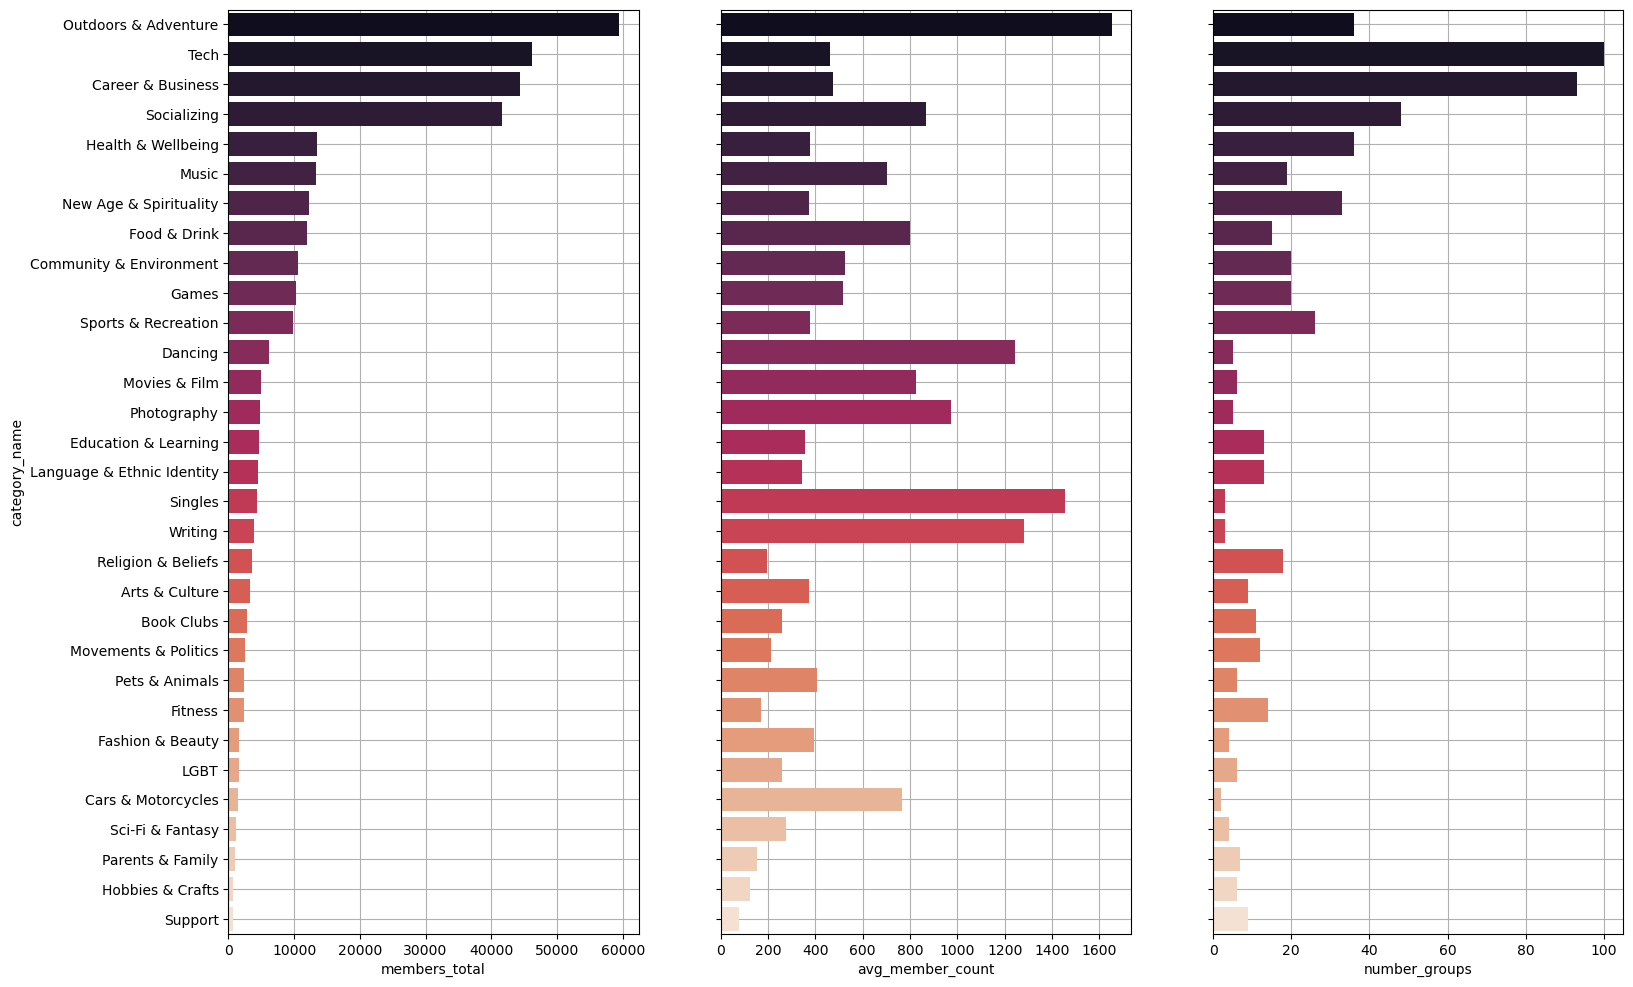

In [ ]:
# aggregate the data that we need.
ordered = groups.groupby(["category_name"]).agg(members_total = ("num_members","sum"), 
                                                avg_member_count = ("num_members", np.average),
                                                number_groups=("group_id", "count")).sort_values(by="members_total", ascending=False)

# instantiate the figure
fig, ax = plt.subplots(1, 3, figsize=(18, 12), sharey=True)
fig.patch.set_facecolor("white")

    
# plot on the axes and show grids
for j, i in enumerate(["members_total", "avg_member_count", "number_groups"]):
    sns.barplot(y=ordered.index, x=i, data=ordered, palette="rocket", ax=ax[j], 
                hue=ordered.index, legend=False) 
    
    ax[j].grid(visible=True)
    ax[j].set_axisbelow(True)

In [30]:
groups

,group_id,group_name,num_members,category_id,category_name,organizer_id,group_urlname
0,339011,Nashville Hiking Meetup,15838,23,Outdoors & Adventure,4353803,nashville-hiking
1,19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance
2,6335372,Nashville soccer,2869,32,Sports & Recreation,108448302,Nashville-soccer
3,10016242,NashJS,1975,34,Tech,8111102,nashjs
4,21174496,20's & 30's Women looking for girlfriends,2782,31,Socializing,184580248,new-friends-in-Nashville
...,...,...,...,...,...,...,...
597,23742545,Smyrna Yoga Zumba & Boot Camp Women Only,139,9,Fitness,226783032,Smyrna-Yoga-Zumba-Boot-Camp-Women-Only
598,20647425,ML/JP Dance Music Family,97,21,Music,173945092,ML-JP-Dance-Music-Family
599,22504351,Sumner County Shooters,32,32,Sports & Recreation,6141229,SumnerCountyShooters
600,21686664,Gallatin Makerspace,118,34,Tech,126066112,GallatinMakerspace
